In [424]:
import pandas as pd
import numpy as np
import pickle

from pathlib import Path

import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler as scaler
from sklearn.preprocessing import OneHotEncoder as OHE

from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report

from sklearn.model_selection import train_test_split

In [425]:
def fitting(clf, data_tr, y_train):
    clf.fit(data_tr, y_train.reshape(-1, 1))
    return clf

In [426]:
def preds(clf):
    a = clf.predict(data[X_train]).sum()
    b = clf.predict(data[X_test]).sum()
    
    print(classification_report(y_train, clf.predict(data[X_train])))
    print(classification_report(y_test, clf.predict(data[X_test])))
    
    return a, b

In [427]:
current_path = Path.cwd()

df = pd.read_csv(current_path.joinpath('dataset.csv'), delimiter=';')

## Data

In [428]:
df[df['default'].isna()].isnull().sum()

uuid                                       0
default                                10000
account_amount_added_12_24m                0
account_days_in_dc_12_24m               1153
account_days_in_rem_12_24m              1153
account_days_in_term_12_24m             1153
account_incoming_debt_vs_paid_0_24m     5958
account_status                          5439
account_worst_status_0_3m               5439
account_worst_status_12_24m             6706
account_worst_status_3_6m               5764
account_worst_status_6_12m              6037
age                                        0
avg_payment_span_0_12m                  2368
avg_payment_span_0_3m                   4923
merchant_category                          0
merchant_group                             0
has_paid                                   0
max_paid_inv_0_12m                         0
max_paid_inv_0_24m                         0
name_in_email                              0
num_active_div_by_paid_inv_0_12m        2281
num_active

In [429]:
df_valid = df[df['default'].isna()].copy()

In [430]:
df = df[~df['default'].isna()].copy()

In [431]:
df.isnull().sum()[df.isnull().sum() > 20000]

account_incoming_debt_vs_paid_0_24m    53357
account_status                         48934
account_worst_status_0_3m              48934
account_worst_status_12_24m            60055
account_worst_status_3_6m              51938
account_worst_status_6_12m             54313
avg_payment_span_0_12m                 21468
avg_payment_span_0_3m                  44382
num_active_div_by_paid_inv_0_12m       20658
worst_status_active_inv                62540
dtype: int64

In [432]:
df[df['default'] == 1].isnull().sum()

uuid                                      0
default                                   0
account_amount_added_12_24m               0
account_days_in_dc_12_24m                91
account_days_in_rem_12_24m               91
account_days_in_term_12_24m              91
account_incoming_debt_vs_paid_0_24m     574
account_status                          452
account_worst_status_0_3m               452
account_worst_status_12_24m             748
account_worst_status_3_6m               570
account_worst_status_6_12m              632
age                                       0
avg_payment_span_0_12m                  618
avg_payment_span_0_3m                  1029
merchant_category                         0
merchant_group                            0
has_paid                                  0
max_paid_inv_0_12m                        0
max_paid_inv_0_24m                        0
name_in_email                             0
num_active_div_by_paid_inv_0_12m        573
num_active_inv                  

In [433]:
df[df.isnull().sum()[df.isnull().sum() > 20000].index]

,account_incoming_debt_vs_paid_0_24m,account_status,account_worst_status_0_3m,account_worst_status_12_24m,account_worst_status_3_6m,account_worst_status_6_12m,avg_payment_span_0_12m,avg_payment_span_0_3m,num_active_div_by_paid_inv_0_12m,worst_status_active_inv
0,0.0,1.0,1.0,NaN,1.0,NaN,12.692308,8.333333,0.153846,1.0
1,NaN,1.0,1.0,1.0,1.0,1.0,25.833333,25.000000,0.000000,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,20.000000,18.000000,0.071429,1.0
3,NaN,NaN,NaN,NaN,NaN,NaN,4.687500,4.888889,0.031250,1.0
4,NaN,NaN,NaN,NaN,NaN,NaN,13.000000,13.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...
89971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89972,NaN,NaN,NaN,NaN,NaN,NaN,10.166667,8.000000,0.000000,NaN
89973,NaN,1.0,1.0,1.0,1.0,1.0,13.555556,15.000000,0.000000,NaN
89974,NaN,NaN,NaN,NaN,NaN,NaN,13.400000,12.500000,0.000000,NaN


### columns processing

In [434]:
#treat columns with less than 10 unique values and initially numerical as categorical, fillna 999
#fill columns with numerical values with median

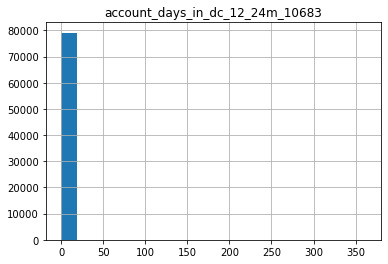

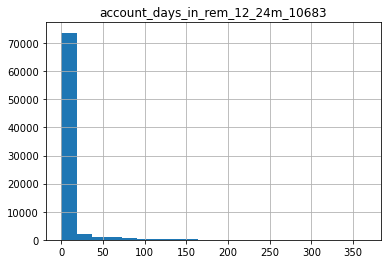

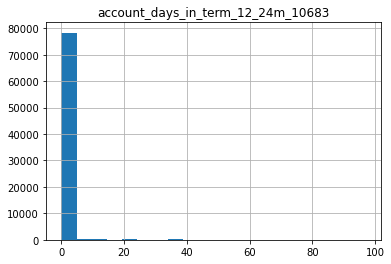

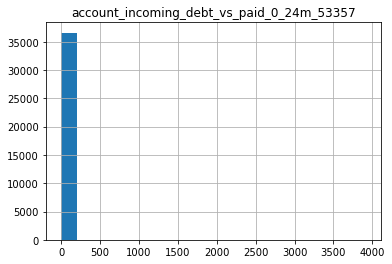

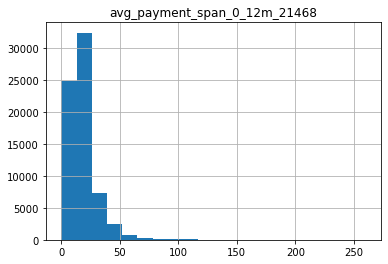

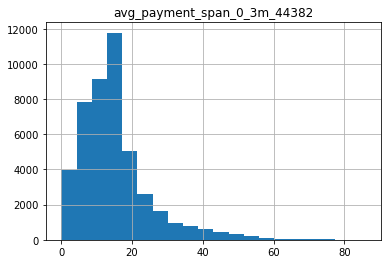

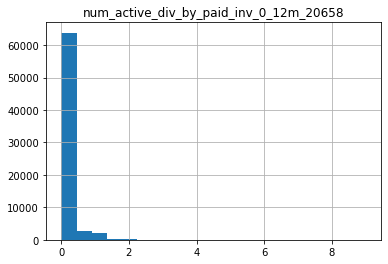

In [435]:
cols_numerical = []
cols_num_to_categorical = []
cols_wo_na = []

for c in df:
    if (df[c].dtype == 'float64' or df[c].dtype == 'int64') and df[c].isnull().sum() > 0 and len(df[c].unique()) > 10:
        df[c].hist(bins = 20)
        plt.title(f'{c}_{df[c].isnull().sum()}')
        plt.show()
        cols_numerical.append(c)
    elif c != 'uuid' and c != 'default' and df[c].dtype != 'object' and df[c].isnull().sum() > 0:
        cols_num_to_categorical.append(c)
    else:
        cols_wo_na.append(c)

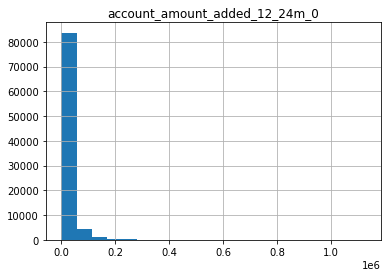

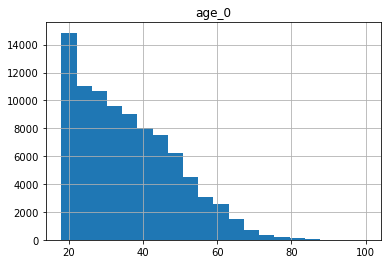

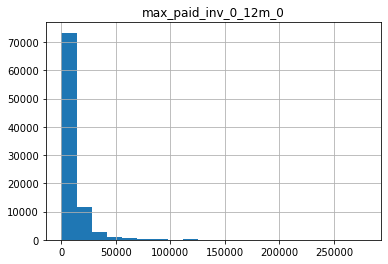

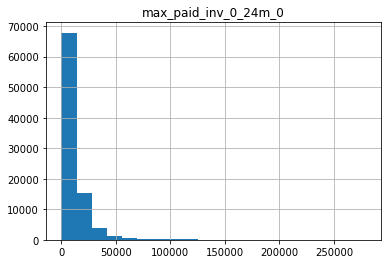

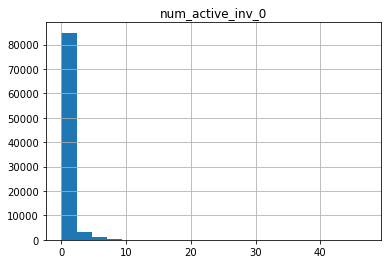

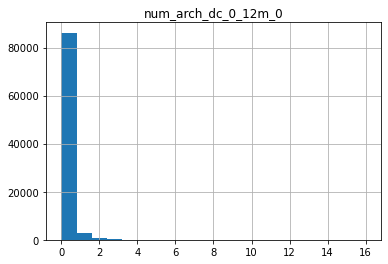

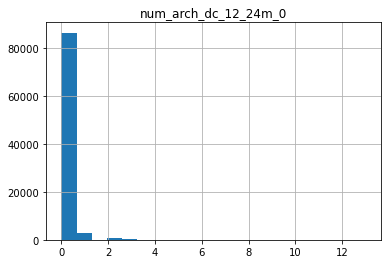

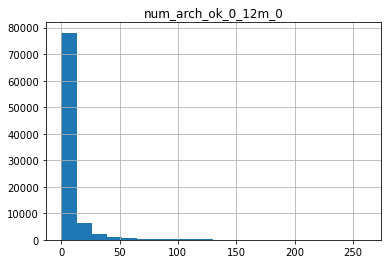

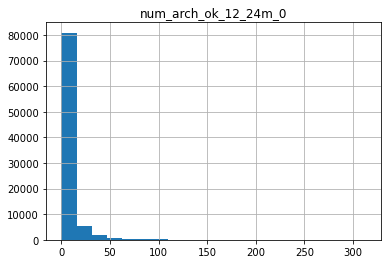

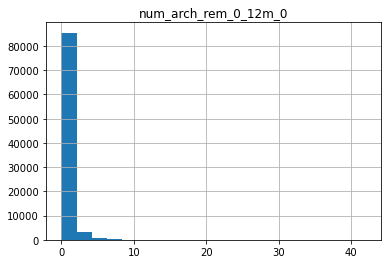

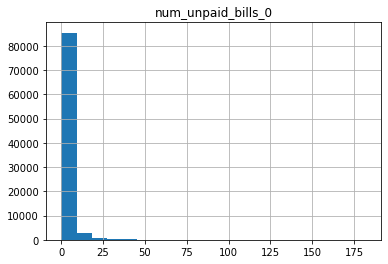

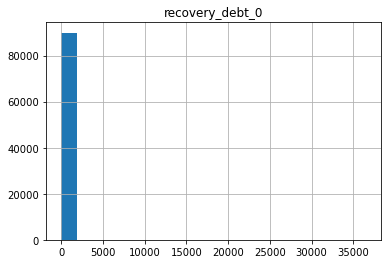

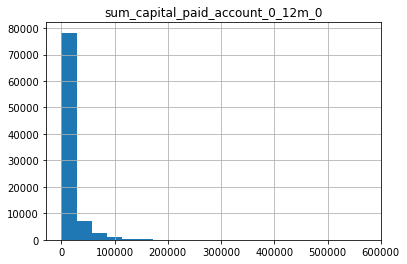

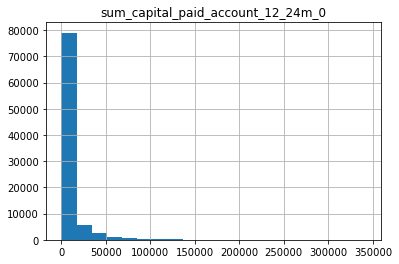

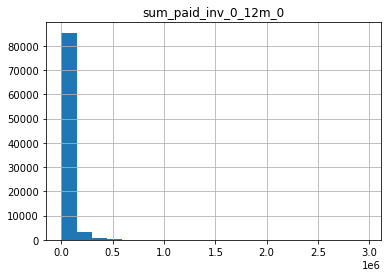

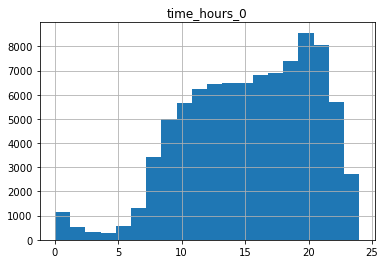

In [436]:
cols_numerical_wo_na = []
cols_num_to_categorical_wo_na = []
others = []

for c in cols_wo_na:
    if (df[c].dtype == 'float64' or df[c].dtype == 'int64') and len(df[c].unique()) > 10:
            df[c].hist(bins = 20)
            plt.title(f'{c}_{df[c].isnull().sum()}')
            plt.show()
            cols_numerical_wo_na.append(c)
    elif c != 'uuid' and c != 'default' and df[c].dtype != 'object':
        cols_num_to_categorical_wo_na.append(c)
    elif c != 'uuid' and c != 'default':
        others.append(c)
    else:
        None

In [437]:
num_cols = cols_numerical + cols_numerical_wo_na

In [438]:
cat_cols = cols_num_to_categorical + cols_num_to_categorical_wo_na + others

### pickle columns

In [439]:
with open('num_cols.pickle', 'wb') as f:
    pickle.dump(num_cols, f)
    
with open('cat_cols.pickle', 'wb') as f:
    pickle.dump(cat_cols, f)

In [440]:
df_num = df[df.columns[df.columns.isin(num_cols)]].fillna(df[df.columns[df.columns.isin(cols_numerical + cols_numerical_wo_na)]].median())

In [441]:
df_num = scaler().fit_transform(df_num)

In [442]:
df_num.shape

(89976, 23)

### One_hot categorical

In [443]:
ohe = OHE(sparse = False, handle_unknown = 'ignore')

In [444]:
df_cat = df[df.columns[~df.columns.isin(['uuid', 'default'] + num_cols)]].fillna(999).astype('object')

In [445]:
ohe.fit(df_cat)

OneHotEncoder(handle_unknown='ignore', sparse=False)

#### saving ohe

In [446]:
with open('ohe.pickle', 'wb') as f:
    pickle.dump(ohe, f)

### Transform and data gathering

In [447]:
df_cat = ohe.transform(df_cat)

In [448]:
df_cat.shape

(89976, 144)

In [449]:
data = np.concatenate((df_num, df_cat), axis = 1)

## Train stage

In [450]:
X_train, X_test, y_train, y_test = train_test_split(df.index, df['default'], test_size = 0.3, random_state = 13, stratify = df['default'], shuffle = True)

In [451]:
# w_0 = df['default'].value_counts()[1]/len(df['default'])
# w_1 = df['default'].value_counts()[0]/len(df['default'])

w_0 = len(data)/(2*np.bincount(df['default']))[0]
w_1 = len(data)/(2*np.bincount(df['default']))[1]

### Downsampling

In [452]:
n_samples = 1000

In [453]:
train_data_sample_X = pd.DataFrame(data[~(y_train > 0).index]).sample(n_samples, random_state = 13).index
test_data_sample_X = pd.DataFrame(data[~(y_test > 0).index]).sample(n_samples, random_state = 13).index

train_data_sample_X = data[train_data_sample_X]
test_data_sample_X = data[test_data_sample_X]

train_data_sample_Y = data[y_train[(y_train == 1)].index]
test_data_sample_Y = data[y_test[(y_test == 1)].index]

train_data_sample_X = pd.DataFrame(np.concatenate((train_data_sample_X, train_data_sample_Y))).sample(frac = 1, random_state = 13)
test_data_sample_X = pd.DataFrame(np.concatenate((test_data_sample_X, test_data_sample_Y))).sample(frac = 1, random_state = 13)

train_labels = pd.DataFrame(np.concatenate((np.zeros(n_samples), np.ones(902)))).loc[train_data_sample_X.index].to_numpy()
test_labels = pd.DataFrame(np.concatenate((np.zeros(n_samples), np.ones(386)))).loc[test_data_sample_X.index].to_numpy()

train_data_sample_X = train_data_sample_X.to_numpy()
test_data_sample_X = test_data_sample_X.to_numpy()

In [454]:
lgcv = LogisticRegressionCV(cv=10, random_state=13, class_weight = {0.:w_1, 1.: w_0}, solver = 'lbfgs')
lg = LogisticRegressionCV(random_state=13, class_weight = {0.:w_1, 1.: w_0}, solver = 'lbfgs')
random_forest = RandomForestClassifier(max_depth = 21, class_weight = {0.:w_1, 1.: w_0})

#### if downsampled

In [455]:
lgcv = LogisticRegressionCV(cv=10, random_state=13, solver = 'lbfgs')
lg = LogisticRegression(random_state=13, solver = 'lbfgs')
random_forest = RandomForestClassifier(max_depth = 15)

### training the classificator

In [456]:
clf = fitting(random_forest, train_data_sample_X, train_labels)

C:\Users\gleb\AppData\Local\Temp\ipykernel_6460\3589149351.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(data_tr, y_train.reshape(-1, 1))


In [457]:
preds(clf)

              precision    recall  f1-score   support

         0.0       1.00      0.79      0.88     62081
         1.0       0.06      0.98      0.12       902

    accuracy                           0.80     62983
   macro avg       0.53      0.89      0.50     62983
weighted avg       0.99      0.80      0.87     62983

              precision    recall  f1-score   support

         0.0       1.00      0.80      0.89     26607
         1.0       0.06      0.83      0.11       386

    accuracy                           0.80     26993
   macro avg       0.53      0.82      0.50     26993
weighted avg       0.98      0.80      0.88     26993



(13731.0, 5579.0)

### Saving the model

In [458]:
with open('model.pickle', 'wb') as f:
    pickle.dump(clf, f)

### Loading the model

In [412]:
cols_cat = pickle.load(open('cat_cols.pickle','rb'))

In [414]:
cols_num = pickle.load(open('num_cols.pickle','rb'))

In [416]:
encoder = pickle.load(open('ohe.pickle','rb'))

In [409]:
model = pickle.load(open('model.pickle','rb'))

### Gridsearch

In [318]:
from sklearn.model_selection import GridSearchCV

In [323]:
gclf = GridSearchCV(clf, {'max_depth': np.arange(1,41, 4)})

In [324]:
gclf.fit(data[X_train], y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([ 1,  5,  9, 13, 17, 21, 25, 29, 33, 37])})